In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


In [3]:
df = pd.read_csv('Admission_Predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(400, 9)

In [ ]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
df['Chance of Admit '] = df['Chance of Admit ']*100

In [6]:
# normalize data - removing searial number
df2 = df.iloc[:,1:]

In [7]:
df2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,92.0
1,324,107,4,4.0,4.5,8.87,1,76.0
2,316,104,3,3.0,3.5,8.00,1,72.0
3,322,110,3,3.5,2.5,8.67,1,80.0
4,314,103,2,2.0,3.0,8.21,0,65.0


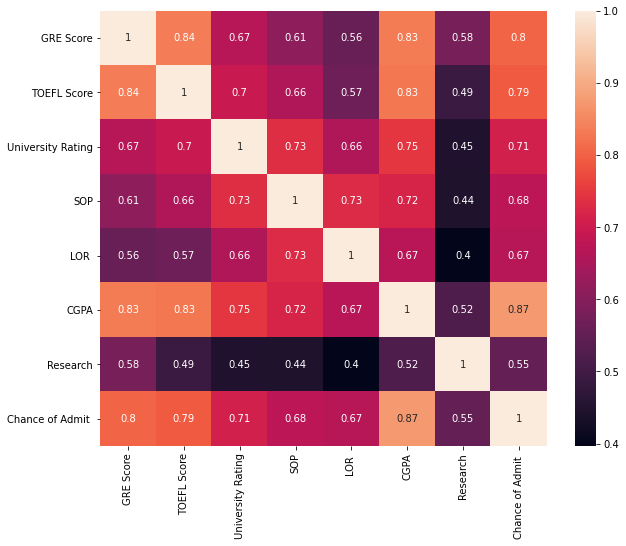

In [8]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.heatmap(df2.corr(), annot=True)

In [9]:
new_x = df2.iloc[:,:-1]
new_y = df2.iloc[:, -1]

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(new_x, new_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# predicting the data

pred_y = reg.predict(new_x)

In [12]:
from sklearn.metrics import r2_score
print(r2_score(new_y, pred_y))

0.8034713719824393


In [13]:
df2.iloc[1,:]

GRE Score            324.00
TOEFL Score          107.00
University Rating      4.00
SOP                    4.00
LOR                    4.50
CGPA                   8.87
Research               1.00
Chance of Admit       76.00
Name: 1, dtype: float64

In [14]:
# checking model is predicting right or wrong and 
# both model and actual predict correct only 
# difference is 4% that is the error scenario
reg.predict([[324,107,4,4,4.50,8.87,1.00]])

array([80.56366792])

In [16]:
from sklearn.metrics import explained_variance_score, max_error
explained_variance_score(new_y, pred_y)

0.8034713719824393

In [17]:
max_error(new_y, pred_y)

26.25863210840231

In [18]:
round(0.2625863210840231+0.8034713719824395)

1

In [19]:
# spliting data and train it and test size is 20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(new_x, new_y, test_size=0.2, random_state = 0)

In [20]:
X_train.shape

(320, 7)

In [21]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred_test = regressor.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7355078738145215

In [24]:
# spliting data and train it and test size is 30%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(new_x, new_y, test_size=0.3, random_state = 0)

# taking object of Model class
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predicting the data respective x_test
y_pred_test = regressor.predict(X_test)

# checking accuracy of model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7456624883029339

In [26]:
# spliting data and train it and test size is 50%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(new_x, new_y, test_size=0.5, random_state = 0)

# taking object of Model class
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predicting the data respective x_test
y_pred_test = regressor.predict(X_test)

# checking accuracy of model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7575328475422022

#      **MODEL GIVES 75% ACCURACY.....**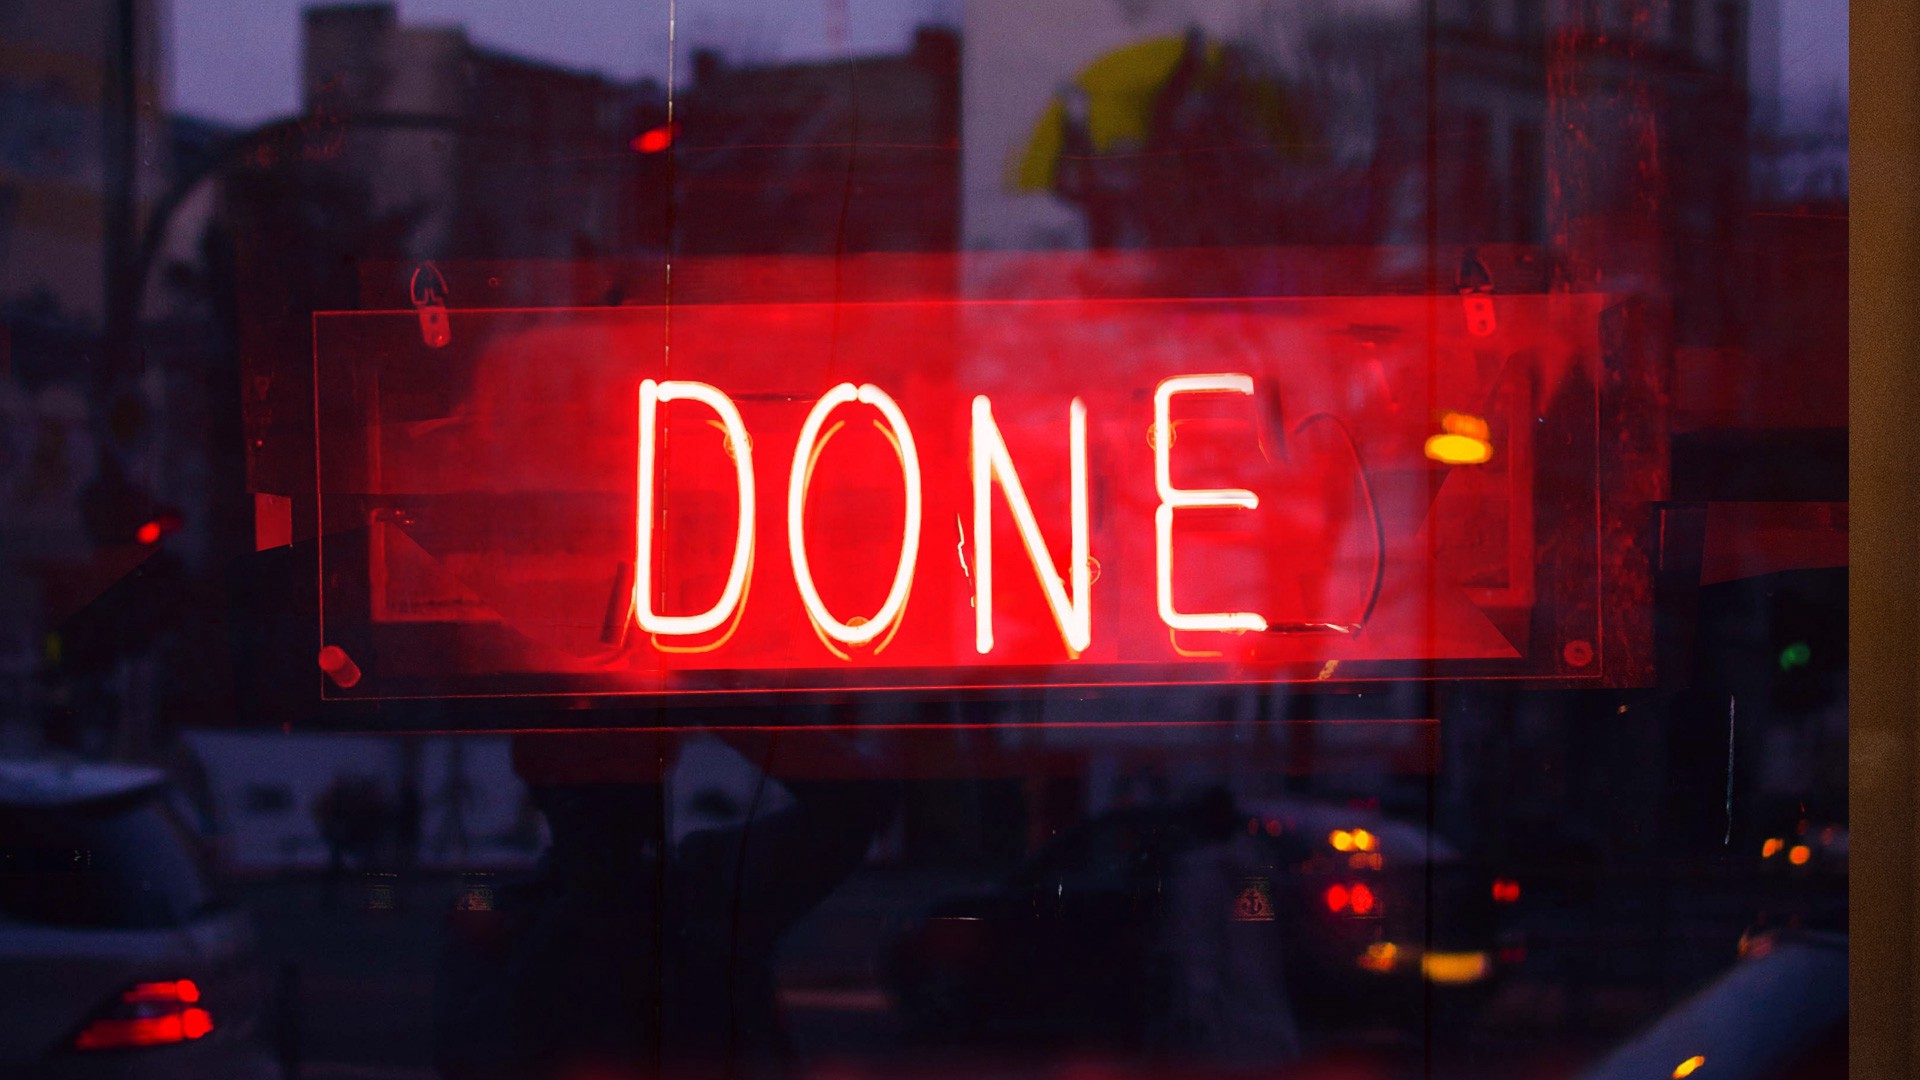